         house1       house2       house3       house4
0      0.000000     0.000000     0.000000     0.000000
1      0.000000     0.000000     0.000000     0.000000
2      0.000000     0.000000     0.000000     0.000000
3      0.000000     0.000000     0.000000     0.000000
4      0.000000     0.000000     0.000000     0.000000
5    297.576296   278.050941   956.989550   874.686471
6   1274.789593   750.643200  1318.747855   730.154180
7    690.712032  2066.384520   726.790102  1588.480813
8   1560.216466  2731.574776  2305.129277  1806.242716
9   2232.519396  3090.092979  3227.338023  1710.156437
10  2307.846681  2848.041186  1497.083550   966.316523
11  2371.108688  1021.875209  3804.918012  1037.795368
12  2709.847596  1645.858356  1789.614255  1679.108020
13  1492.912486  2434.485589  2209.832691  2223.258163
14  2883.427985  1040.475072  2824.691489  1865.074451
15   639.306728  1533.488581  1463.261706  1386.980790
16  1193.735945   450.559257  1000.447366   911.856768
17   656.5

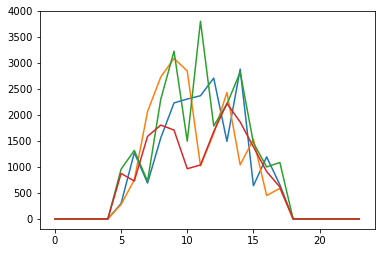

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
class PV_gen(object):

    def __init__(self,start_t=5,end_t=18,dt_time=24,max_pv=4000,min_pv=1000):
        self.start_t=start_t
        self.end_w=end_t
        self.dt_time=dt_time
        self.max_pv=max_pv
        self.min_pv=min_pv
        self.start_data=0
        self._data_init()
        
    def _data_init(self):
        bins=[-0.30051769, -0.27382177, -0.24712585, -0.22042993, -0.19373401, -0.16703809, -0.14034217,
              -0.11364625, -0.08695033, -0.06025441, -0.0335585,  -0.00686258, 0.01983334,  0.04652926,
              0.07322518,  0.0999211,   0.12661702,  0.15331294, 0.18000886,  0.20670478 , 0.23340069,
              0.26009661,  0.28679253,  0.31348845]
        start_zero=list(np.zeros(self.start_t))
        mid_one=list(np.ones(self.end_w-self.start_t))
        last_zero=list(np.zeros(self.dt_time-self.end_w))
        self.start_data=start_zero+mid_one+last_zero
        mu, sigma = 0, 0.1
        a=[]
        for i in range(24):
            a.append(1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins[i] - mu)**2 / (2 * sigma**2) ))
        a=np.array(a)
        self.start_data= np.array(self.start_data)*a/4
    
    def _datas(self,_head):
        """create data for load"""
        data={}
        pv=np.random.randint(self.min_pv,self.max_pv,size=self.dt_time)
        pv=pv*self.start_data
        data[_head]=pv
        return pd.DataFrame(data,columns= [_head])
    
    def _data(self,cols):
        load_cols=[]
        for col in range(len(cols)):
            if len(load_cols)==0:
                load_data=self._datas(cols[col]) 
                load_cols.append(load_data.columns[0])
            else:
                load_datas=self._datas(cols[col]) 
                if load_datas.columns[0] not in load_cols:
                    load_cols.append(load_datas.columns[0])
                    load_data=load_data.join(load_datas)
                    
        return load_data
    
pv=PV_gen()
pv_p=pv._data(["house1","house2",'house3','house4'])
print(pv_p)
plt.plot(pv_p)

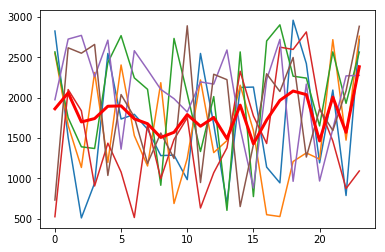

In [2]:
class Load_gen(object):

    def __init__(self,low_w=500,high_w=3000,dt_time=24):
        self.low_w=low_w
        self.high_w=high_w
        self.dt_time=dt_time

    def _datas(self,_head):
        """create data for load"""
        data={}
        load=np.random.randint(self.low_w,self.high_w,size=self.dt_time)
        data[_head]=load
        return pd.DataFrame(data,columns= [_head])
    
    def _data(self,cols):
        load_cols=[]
        for col in range(len(cols)):
            if len(load_cols)==0:
                load_data=self._datas(cols[col]) 
                load_cols.append(load_data.columns[0])
            else:
                load_datas=self._datas(cols[col]) 
                if load_datas.columns[0] not in load_cols:
                    load_cols.append(load_datas.columns[0])
                    load_data=load_data.join(load_datas)
                    
        return load_data
load=Load_gen()
load_data=load._data(['house1','house2','house3','house4','hosue5','house7'])
avg=load_data.mean(axis=1)
plt.plot(load_data)
plt.plot(avg,color="r",linewidth=3.0)

[0, 0, 18, 0, 0, 0, 0, 0, 0, 3, 0, 0, 18, 0, 18, 0, 18, 0, 2, 0, 1, 0, 0, 20, 0, 0, 1, 20, 19, 18, 0, 20, 0, 18, 2, 0, 0, 18, 0, 0, 0, 18, 0, 0, 18, 0, 0, 0, 23, 0, 0, 0, 0, 19, 18, 0, 0, 0, 0, 18, 0, 0, 21, 0, 2, 0, 18, 0, 0, 0, 0, 0, 0, 18, 18, 0, 0, 0, 18, 23, 0, 0, 0, 0, 0, 23, 0, 0, 23, 0, 0, 1, 0, 23, 18, 0, 23, 18, 0, 0]


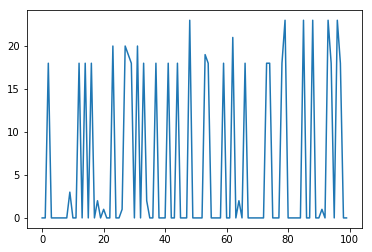

In [3]:
a={'0': 0, '1': 0, '2': 18, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 3, '10': 0, '11': 0, '12': 18, '13': 0, '14': 18, '15': 0, '16': 18, '17': 0, '18': 2, '19': 0, '20': 1, '21': 0, '22': 0, '23': 20, '24': 0, '25': 0, '26': 1, '27': 20, '28': 19, '29': 18, '30': 0, '31': 20, '32': 0, '33': 18, '34': 2, '35': 0, '36': 0, '37': 18, '38': 0, '39': 0, '40': 0, '41': 18, '42': 0, '43': 0, '44': 18, '45': 0, '46': 0, '47': 0, '48': 23, '49': 0, '50': 0, '51': 0, '52': 0, '53': 19, '54': 18, '55': 0, '56': 0, '57': 0, '58': 0, '59': 18, '60': 0, '61': 0, '62': 21, '63': 0, '64': 2, '65': 0, '66': 18, '67': 0, '68': 0, '69': 0, '70': 0, '71': 0, '72': 0, '73': 18, '74': 18, '75': 0, '76': 0, '77': 0, '78': 18, '79': 23, '80': 0, '81': 0, '82': 0, '83': 0, '84': 0, '85': 23, '86': 0, '87': 0, '88': 23, '89': 0, '90': 0, '91': 1, '92': 0, '93': 23, '94': 18, '95': 0, '96': 23, '97': 18, '98': 0, '99': 0}
r_data=[]
for k, v in a.items():
    r_data.append(v)
print(r_data)
plt.plot(r_data)